## Grafici

In [123]:
# for the dataset
import pandas as pd    
import numpy as np

# general
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# for the tree
from sklearn.tree import DecisionTreeClassifier

# for the Random forest
from sklearn.ensemble import RandomForestClassifier

# for the SVM + packages for pipelines and scaling
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# for the Gaussian
from sklearn.naive_bayes import GaussianNB

# for KNN
from sklearn.neighbors import KNeighborsClassifier

# to print more results and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [81]:
#Dataset

# setting up labels for dataset
labels = ('class', 'spec_num', 'eccentr', 'asp_ratio', 'elong', 'solidity', 'stoch_conv', 'iso_factor', 'max_ind_depth', 'lobedness', 'av_intensity', 'av_contr', 'smooth', 'third_mom', 'unif', 'entropy')

# importing data
df = pd.read_csv(r'./leaf/leaf.csv', header = None, names = labels)

In [153]:
# for training and testing static division, if needed
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

### Single tree

In [82]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

#Grid Search - finding best estimators

# shuffling the dataframe + separating y from x + eliminating specimen number variable
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

# griglia dei parametri su cui fare la ricerca
grid_param = {'criterion': ['gini', 'entropy'], 'min_samples_split': np.arange(2, 20)}

tree_cv = GridSearchCV(tree.DecisionTreeClassifier(), grid_param, cv=5, scoring='balanced_accuracy')
tree_cv.fit(X, y)
print(tree_cv.best_score_)   #result: 0.6288888888888888
print(tree_cv.best_params_)  #result: {'criterion': 'entropy', 'min_samples_split': 9}

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='balanced_accuracy')

0.6461111111111111
{'criterion': 'entropy', 'min_samples_split': 4}


In [159]:
# Dati per grafico Single Tree - tentativo 1

TREE = []

for i in range(20):
    clf_T1 = cross_validate(DecisionTreeClassifier(criterion = "entropy", min_samples_split = 9), X, y, cv=5, scoring = "balanced_accuracy")
    scores_tree = np.mean(clf_T1["test_score"])
    TREE.append(scores_tree)
    
print(TREE)

[0.6266666666666667, 0.6244444444444445, 0.62, 0.61, 0.6211111111111111, 0.6355555555555555, 0.62, 0.6388888888888888, 0.6155555555555555, 0.6288888888888888, 0.63, 0.6211111111111112, 0.6322222222222222, 0.6411111111111111, 0.6344444444444444, 0.6166666666666666, 0.6222222222222221, 0.6222222222222221, 0.6255555555555555, 0.6299999999999999]


### Random forest

In [84]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

# Grid Search - finding best estimators

# shuffling the dataframe + separating y from x + eliminating specimen number variable
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

# griglia dei parametri su cui fare la ricerca
grid_param = {"n_estimators": (100, 200, 500, 700), 'criterion': ('gini', 'entropy'), 'max_features': ('sqrt', 5)}

rf_cv = GridSearchCV(RandomForestClassifier(), grid_param, cv=5, scoring='balanced_accuracy', n_jobs=5)
rf_cv.fit(X, y)
print(rf_cv.best_score_)    #result: 0.7766666666666666
print(rf_cv.best_params_)   #result: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 700}

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('sqrt', 5),
                         'n_estimators': (100, 200, 500, 700)},
             scoring='balanced_accuracy')

0.8055555555555556
{'criterion': 'gini', 'max_features': 5, 'n_estimators': 700}


In [156]:
# Dati per grafico Random Forest - tentativo 1

RAN_FOR = []

for i in range(20):
    clf_RF1 = cross_validate(RandomForestClassifier(n_estimators = 700, criterion = "entropy", max_features= 5), X, y, cv=5, scoring = "balanced_accuracy", n_jobs = 5)
    scores_RF = np.mean(clf_RF1["test_score"])
    RAN_FOR.append(scores_RF)
print(RAN_FOR)

[0.7588888888888888, 0.7511111111111111, 0.7422222222222222, 0.74, 0.74, 0.7533333333333333, 0.7533333333333333, 0.7433333333333334, 0.7422222222222222, 0.7466666666666667, 0.7455555555555555, 0.7422222222222222, 0.7511111111111111, 0.7388888888888889, 0.7555555555555555, 0.7488888888888889, 0.7433333333333334, 0.7355555555555556, 0.7555555555555555, 0.74]


In [57]:
#dati per grafico Random Forest - tentativo 2

RF=[]

for i in range(1, 6):
    clf_RF2 = RandomForestClassifier(n_estimators = 700, criterion = "entropy", max_features = 5)
    clf_RF2.fit(X_train,y_train)
    predictions = clf_RF2.predict(X_test)
    RF.append(accuracy_score(y_test, predictions))

print(RF)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=700)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=700)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=700)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=700)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=700)

[0.7294117647058823, 0.7529411764705882, 0.7411764705882353, 0.7294117647058823, 0.7176470588235294]


### SVM

In [98]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

# Grid Search - finding best estimators

# building the pipeline
pipe = Pipeline([('scaling', StandardScaler()),
                 ('SVM', svm.SVC(decision_function_shape='ovo'))])

# building the range of the regularization parameter (C) and of gamm
reg_param = np.logspace(-10, 11, 22)
gamm = np.logspace(-9, 3, 13)

grid_param = {'SVM__C': reg_param,
              'SVM__kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 
              'SVM__degree': np.arange(2, 5),
              'SVM__decision_function_shape': ('ovo', 'ovr'),
              'SVM__gamma': gamm}

# shuffling the dataframe
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
# separating y from x and eliminating specimen number variable
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

svm_cv = GridSearchCV(pipe, grid_param, cv=5, scoring='balanced_accuracy', n_jobs=5)
svm_cv.fit(X,y)

print(svm_cv.best_score_)  # result: 0.7844444444444444
print(svm_cv.best_params_) # result: {'SVM__C': 10000.0, 'SVM__decision_function_shape': 'ovo', 'SVM__degree': 2, 'SVM__gamma': 0.01, 'SVM__kernel': 'sigmoid'}

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('SVM',
                                        SVC(decision_function_shape='ovo'))]),
             n_jobs=5,
             param_grid={'SVM__C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10, 1.e+11]),
                         'SVM__decision_function_shape': ('ovo', 'ovr'),
                         'SVM__degree': array([2, 3, 4]),
                         'SVM__gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'SVM__kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='balanced_accuracy')

0.7811111111111111
{'SVM__C': 1000000.0, 'SVM__decision_function_shape': 'ovo', 'SVM__degree': 2, 'SVM__gamma': 1e-05, 'SVM__kernel': 'rbf'}


In [160]:
# Dati per grafico SVM

SVM = []

for i in range(20):
    clf_SVM1 = cross_validate(svm.SVC(C = 10000.0, decision_function_shape = "ovo", degree = 2, gamma = 0.01, kernel = "sigmoid"), X, y, cv=5, scoring = "balanced_accuracy")
    scores_SVM1 = np.mean(clf_SVM1["test_score"])
    SVM.append(scores_SVM1)

print(SVM)

[0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666, 0.6566666666666666]


### Naive bayes

In [131]:
# No grid search since we don't have any hyper-parameters to choose

# shuffling the dataframe
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
# separating y from x and eliminating specimen number variable
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

In [155]:
# Dati per grafico Naive Bayes

# k-fold cross validation

NB = []

for i in range(20):
    effect_NB_cv = cross_validate(GaussianNB(), X, y, cv= 5, scoring='balanced_accuracy')
    scores_NB1 = np.mean(effect_NB_cv["test_score"])
    NB.append(scores_NB1)
    
print(NB)

[0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332, 0.7333333333333332]


### KNN

In [129]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

# Grid Search - finding best estimators

# shuffling the dataframe
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
# separating y from x and eliminating specimen number variable
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

# griglia dei parametri su cui fare la ricerca
grid_param_cv = {'n_neighbors': np.arange(1, 340), 'weights': ('uniform', 'distance')}

knn_cv = GridSearchCV(KNeighborsClassifier(), grid_param_cv, cv= 5, scoring='balanced_accuracy', return_train_score=False, verbose=0, n_jobs= 5)
knn_cv.fit(X, y)
print(knn_cv.best_score_)  # result: 0.6088888888888888
print(knn_cv.best_params_) # result: {'n_neighbors': 8, 'weights': 'distance'}

/home/silvia/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/silvia/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/silvia/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/home/silvia/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 262, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/silvia/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/silvia/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind =

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89...
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339]),
                         'weights': ('uniform', 'distance')},
             scoring='balanced_accuracy')

0.6088888888888888
{'n_neighbors': 8, 'weights': 'distance'}


In [151]:
# Dati per grafico KNN

KNN = []

for i in range(20):
    clf_KNN1 = cross_validate(KNeighborsClassifier( n_neighbors = 8, weights = "distance"), X, y, cv=5, scoring = "balanced_accuracy", n_jobs = 5)
    scores_KNN1 = np.mean(clf_KNN1["test_score"])
    KNN.append(scores_KNN1)
print(KNN)

[0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776, 0.5877777777777776]


## Graphs

<BarContainer object of 5 artists>

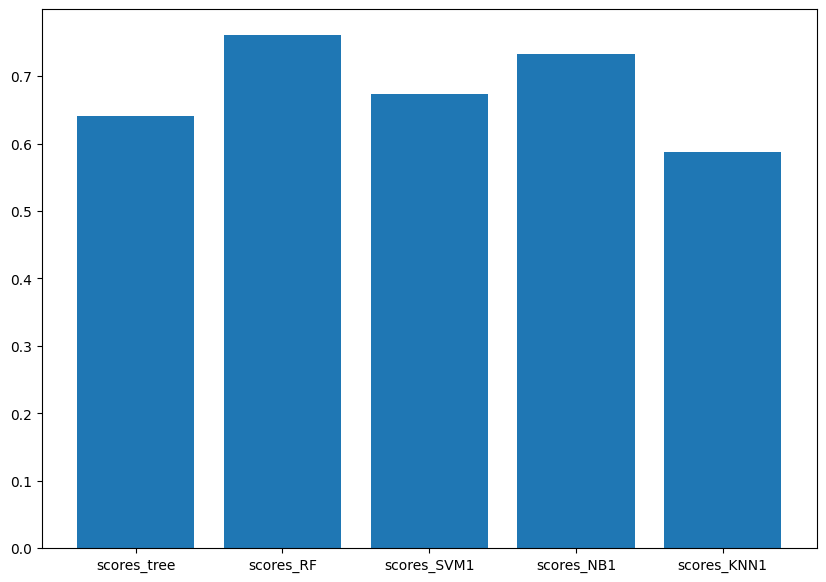

In [140]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7), edgecolor= "blue")

# Creating plot
# plt.boxplot(RF)
# show plot
# plt.show()

all_scores = {'scores_tree': 0.6411, 'scores_RF': 0.7611, 'scores_SVM1': 0.6733, 'scores_NB1':0.7333, 'scores_KNN1':0.5877}
scores = list(all_scores.keys())
values = list(all_scores.values())

#all_scores = ['scores_tree', 'scores_RF', 'scores_SVM1', 'scores_NB1', 'scores_KNN1']
plt.bar(scores, values)
plt.show()